Notebook with queries representing the LSST test queries, but against the Stripe82 database, extended with a match and coadd table following script in Appendix of https://docs.google.com/document/d/1qFOE1s4bQUDM8W7wLzoxb2OK1LaPwzd5Lmy_GKUYut0.

Queries from https://dev.lsstcorp.org/trac/wiki/db/queries

In [28]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

import SciServer.CasJobs as cj


### Extract light curve for a given object (time, magnitude and/or position)


```sql
SELECT taiMidPoint, psfFlux, psfFluxSigma, ra, decl
FROM   Source
JOIN   Filter USING (filterId)
WHERE  objectId = :objectId
   AND filterName = :filterName
```

In [3]:
# LSST schema apparently has one row per filter, SDSS does not.
# Maybe we should make a version of Source similar to the LSST schema.


sql="""
select s.cobjid,p.objid,distance,p.ra,p.dec
  , p.psfMag_u, p.psfMagErr_u, f.mjd_u
  , p.psfMag_g, p.psfMagErr_g, f.mjd_g
  , p.psfMag_r, p.psfMagErr_r, f.mjd_r
  , p.psfMag_i, p.psfMagErr_i, f.mjd_i
  , p.psfMag_z, p.psfMagErr_z, f.mjd_z
  from (select top 1 * from test.coadd order by cobjid asc) o
    inner join test.match s
       on s.cobjid=o.cobjid
    inner join field f
       on f.fieldid=s.fieldid
    inner join PhotoobjAll p
       on s.objId=p.objid
order by mjd_u
"""
df=cj.executeQuery(sql,"Stripe82_016")
df.head()

,cobjid,objid,distance,ra,dec,psfMag_u,psfMagErr_u,mjd_u,psfMag_g,psfMagErr_g,mjd_g,psfMag_r,psfMagErr_r,mjd_r,psfMag_i,psfMagErr_i,mjd_i,psfMag_z,psfMagErr_z,mjd_z
0,8647474690312306771,8658174750926635990,0.001155,309.282577,-1.092810,23.66360,1.000897,51465.134228,21.88472,0.117767,51465.135887,20.27141,0.037314,51465.132570,19.62470,0.026787,51465.133399,19.20947,0.075535,51465.135058
1,8647474690312306771,8658466190224917585,0.001056,309.282565,-1.092796,24.63604,1.385907,52552.171027,21.75185,0.093649,52552.172686,20.31531,0.030692,52552.169369,19.60913,0.026323,52552.170198,19.23982,0.061838,52552.171857
2,8647474690312306771,8658188267453875355,0.001668,309.282555,-1.092783,24.06886,1.223487,52930.080529,21.85983,0.078321,52930.082187,22.47300,0.238211,52930.078870,19.70808,0.027410,52930.079699,19.34076,0.058475,52930.081358
3,8647474690312306771,8658188288660669649,0.001720,309.282560,-1.092810,23.57319,0.816531,52931.081246,22.00162,0.093162,52931.082905,20.35343,0.027503,52931.079588,19.63733,0.021812,52931.080417,19.15340,0.047794,52931.082075
4,8647474690312306771,8658188335908521115,0.001013,309.282567,-1.092800,23.34076,0.650637,52935.078193,21.80889,0.078719,52935.079852,20.36832,0.031579,52935.076534,19.67920,0.024837,52935.077364,19.27402,0.054844,52935.079022


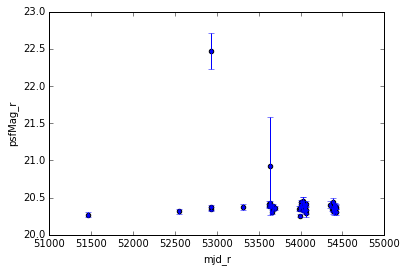

In [33]:
x="mjd_r"
y="psfMag_r"
yerr="psfMagErr_r"
plt.scatter(df[x],df[y])
plt.errorbar(df[x],df[y],yerr=df[yerr], linestyle="None")#,c='red')
plt.xlabel(x)
plt.ylabel(y)

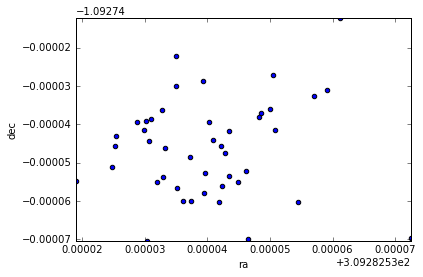

In [32]:
x="ra"
y="dec"
plt.scatter(df[x],df[y])
xlim=(np.min(df[x]),np.max(df[x]))
ylim=(np.min(df[y]),np.max(df[y]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(x)
plt.ylabel(y)

### Select the full color image of a single (given) galaxy

To complete this request we need to:

Run a database query that selects the galaxy based on a given objectId, determines its ra, decl and size as well as corresponding exposureId. Since the epoch is not specified, the most recent one will be fetched.
Generate image cut out through Cutout Service.
The database query:

```sql
SELECT s.ra, s.decl, o.raRange, o.declRange
FROM   Object o
JOIN   Source s USING (objectId)
WHERE  o.objectId = :objectId
AND    o.latestObsTime = s.taiMidPoint
```

In [ ]:
sql="""

"""

### Find an object with a particular objectId

```sql
SELECT *
FROM   Object
WHERE  objectId = :objectId
Origin: this query came from SDSS (SX-4).
```

### Select variable objects near a known galaxy

```sql
SELECT v.objectId, v.ra, v.decl
FROM   Object v, Object o
WHERE  o.objectId = :objectId
   AND spDist(v.ra, v.decl, o.ra, o.decl, :dist)
   AND v.variability > 0.8
   AND o.extendedParameter > 0.8
```

### Give me astrometry for a given moving object

```sql
SELECT diaSourceId, ra, decl
FROM   DiaSource
WHERE  movingObjectId = :movingObjectId
```